<div style="border:1px solid black; padding:20px 20px;text-align: justify;text-justify: inter-word">
    <strong>Exercise Session 2 - *PART 2* (over 2) - Computer vision: basics of computer vision. The first part is done in the interactive session <br/> </strong><br/><br/>
    <span style="text-decoration:underline;font-weight:bold;">How to use this notebook?</span><br/>
    This notebook is made of text cells and code cells. The code cells have to be <strong>executed</strong> to see the result of the program. To execute a cell, simply select it and click on the "play" button (<span style="font: bold 12px/30px Arial, serif;">&#9658;</span>) in the tool bar just above the notebook, or type <code>shift + enter</code>. It is important to execute the code cells in their order of appearance in the notebook.<br/>
You can make use of the table of contents to navigate easily between sections.
</div>

<br/>

<div style="justify;text-justify: inter-word">
So that you may familiarise with the notebooks and the basic python syntax, the exercises are provided in notebook form and whenever there are any calculations to be made, we encourage you to do them by code. Also, if you want to take notes, we encourage you to use the markdown or Raw NBConvert cells. 
</div>

Note : the images used in this exercise session were taken from tutorials online. And although the references are not provided here so that you don't have a sneak peak at the solution, you will not be excused if you do not cite your sources in the project. 

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Goals" data-toc-modified-id="Learning-Goals-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Learning Goals</a></span></li><li><span><a href="#Activity-1---Exploring-Different-Image-Processing-Filters" data-toc-modified-id="Activity-1---Exploring-Different-Image-Processing-Filters-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Activity 1 - Exploring Different Image Processing Filters</a></span><ul class="toc-item"><li><span><a href="#Denoising-Filters" data-toc-modified-id="Denoising-Filters-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Denoising Filters</a></span><ul class="toc-item"><li><span><a href="#Importing-OpenCV,-Reading-and-Displaying-an-Image" data-toc-modified-id="Importing-OpenCV,-Reading-and-Displaying-an-Image-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Importing OpenCV, Reading and Displaying an Image</a></span></li><li><span><a href="#Testing-the-output-of-the-different-filters-on-the-image-to-understand-how-they-work" data-toc-modified-id="Testing-the-output-of-the-different-filters-on-the-image-to-understand-how-they-work-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Testing the output of the different filters on the image to understand how they work</a></span></li></ul></li><li><span><a href="#Edge-Detection-Filters" data-toc-modified-id="Edge-Detection-Filters-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Edge Detection Filters</a></span></li></ul></li><li><span><a href="#Activity-2---Image-Tracking" data-toc-modified-id="Activity-2---Image-Tracking-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Activity 2 - Image Tracking</a></span></li>

---

# PART 2 Learning Goals


- Understanding the main steps of computer vision, from cameraframes to high-level information


- Implementing the tracking of an object. 



Note that you will need opencv for this exercise session

<br/>


In [1]:
!pip install opencv-python tqdm matplotlib numpy ipywidgets
!jupyter nbextension enable --py widgetsnbextension
!pip install --upgrade tdmclient

Defaulting to user installation because normal site-packages is not writeable
usage: jupyter [-h] [--version] [--config-dir] [--data-dir] [--runtime-dir]
               [--paths] [--json] [--debug]
               [subcommand]

Jupyter: Interactive Computing

positional arguments:
  subcommand     the subcommand to launch

options:
  -h, --help     show this help message and exit
  --version      show the versions of core jupyter packages and exit
  --config-dir   show Jupyter config dir
  --data-dir     show Jupyter data dir
  --runtime-dir  show Jupyter runtime dir
  --paths        show all Jupyter paths. Add --json for machine-readable
                 format.
  --json         output paths as machine-readable json
  --debug        output debug information about paths

Available subcommands: kernel kernelspec migrate run troubleshoot

Jupyter command `jupyter-nbextension` not found.
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━

# Activity 1 - Exploring Different Image Processing Filters

The first step of many image processing pipelines includes image filtering. 


You know that filters are applied through convolution and that this can be done in the Fourier space. However, they can also be applied in the image space by computing a moving weighted average between the kernel corresponding to the given filter and the original image. This is illustrated in the image below (taken from [here](https://towardsdatascience.com/types-of-convolution-kernels-simplified-f040cb307c37)). 



<br/>

![Pentagon](images/kernel_conv.png)

<br/>


However, rather than go into the detail of the different implementations of convolutions and the kernels associated to the different filters (which do not get me wrong, you do have to know for the exam), the objective here is to take time to learn about the differences between the different filers by using a computer vision library (opencv) to test them on a dataset of images. 


The types of filters we are intersted (for the moment at least) are :

- **Denoising filters (low pass filters)**, which help reduce the amount of noise in an image and smoothen it out. Examples of denoising filters include average filtering, median filtering, gaussian filtering. 

- **Edge detection filters (high pass filters)**. In the course you have seen the sobel, robert and prewitt filters as well as the Canny Edge filter. 


If you are interested in having more details about these filtering approaches you can have a look at the introduciton to image filtering provided [here](https://ai.stanford.edu/~syyeung/cvweb/tutorial1.html).


## Denoising Filters

The goal here is to undestand the different denoising filters that opencv has to offer and when to use them: 

- **average filtering** with the cv2.blur function


- **median filtering** with the cv2.medianBlur function


- **gaussian filtering** with the cv2.GaussianBlur function


- **bilateral filtering** with the cv2.bilateralFilter function


You can call the help function for each of these functions to access the documentation. In the cell below is an example of how to use the help function. 


In [2]:
help(sum)

Help on built-in function sum in module builtins:

sum(iterable, /, start=0)
    Return the sum of a 'start' value (default: 0) plus an iterable of numbers

    When the iterable is empty, return the start value.
    This function is intended specifically for use with numeric values and may
    reject non-numeric types.



### Importing OpenCV, Reading and Displaying an Image

Now let's start by importing opencv for the image processing and matplotlib for the plotting

In [2]:
import cv2
import matplotlib.pyplot as plt

Now let's load one of the images and display it. 

Note that opencv loads images in BGR mode whilst matplotlib (and most systems in general) work in RGB. That is why when we display the image we need to inverse the order of the last dimension

Here we have loaded an image that contains Gaussian noise. 

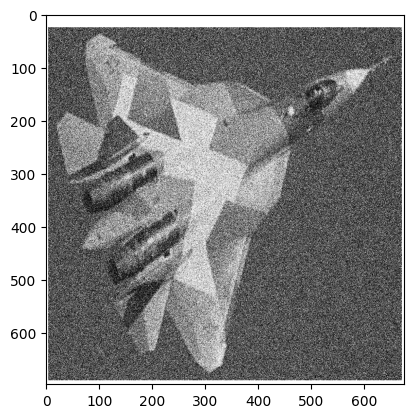

In [18]:
filename = 'images/gaussian_noise.png'
img = cv2.imread(filename, cv2.IMREAD_COLOR)

plt.imshow(img[:,:,::-1])

### Testing the output of the different filters on the image to understand how they work

Apply the filters on the original image and display the output. Play with the parameters to see how they influence the output to get a sense of how they work.

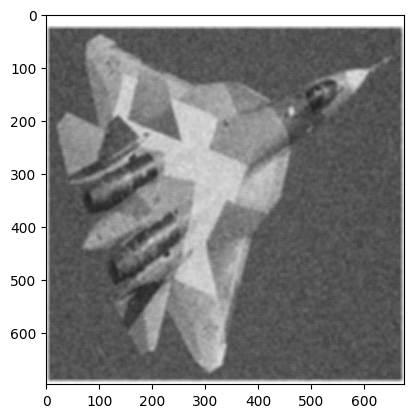

In [24]:
blurred = cv2.blur(img, (8, 8))
plt.imshow(blurred[:,:,::-1])

# median_blur = cv2.medianBlur(img, 5)
# plt.imshow(median_blur)

# gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
# plt.imshow(gaussian_blur[:,:,::-1])

# bilateral = cv2.bilateralFilter(img, 9, 75, 75)
# plt.imshow(bilateral[:,:,::-1])

***What is the particularity of the bilateral filter?***



Now apply the filters on the `gaussian_noise` image. 

![Pentagon](images/gaussian_noise.png)

***Based on your observations, which filter is most adapted if you want to remove gaussian type noise?***



***Which filter would you use if you wanted to remove salt and pepper type noise like the one in the image below?***
    
<br/>

![Pentagon](images/salt_pepper_noise.png)

<br/>


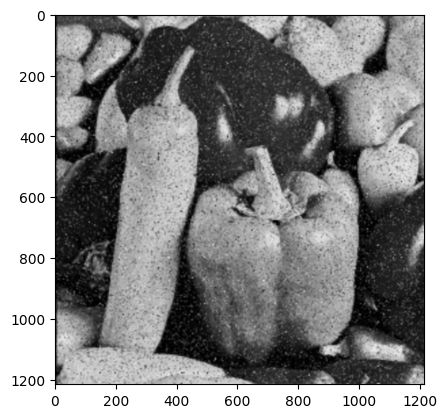

In [39]:
filename = 'images/salt_pepper_noise.png'
img = cv2.imread(filename, cv2.IMREAD_COLOR)

kernel = 12
blurred = cv2.blur(img, (kernel, kernel))
plt.imshow(blurred[:,:,::-1])

median_blur = cv2.medianBlur(img, 5)
plt.imshow(median_blur)

# gaussian_blur = cv2.GaussianBlur(img, (5, 5), 0)
# plt.imshow(gaussian_blur[:,:,::-1])

# bilateral = cv2.bilateralFilter(img, 9, 75, 75)
# plt.imshow(bilateral[:,:,::-1])

## Edge Detection Filters

Let's focus on three filters:

- Sobel (`cv2.Sobel` function): this filter relies on detecting edges in one direction than in the perpendicular to isolate all edges in the image. As it is very close in the underlying principle to the Robers and Prewitt filters we just focus on this one. 

- Laplacian (`cv2.Laplacian` function): this is a new filter which you did not see in the course. Intead of looking for the maximum of the derivative of an image as the Sobel filter does, this filter looks for the zero crossing of the second derivative. 

- Canny (`cv2.Canny` function): a bit more elaborate than the previous two, the gradient of the image is computed but there is an extra processing that looks to validate whether a pixel is actually part of an edge or not.



Apply the different edge detection filters on the ``SanFrancisco`` image and try to get the best results you can by tuning the parameters of the different algorithms.

<br>

![](images/SanFrancisco.jpg)

<br>

***Generally, what should you do before applying the edge detection to improve the results of the filtering?***


In particular, for the Sobel filter try to answer the following questions: 

***When the derivative is along the horizontal axis, what is the effect on the vertical axis?***


***How do you implement a Sobel filter that works in both directions?***

   

Loading the image in grayscale to be able to apply the edge detection filters

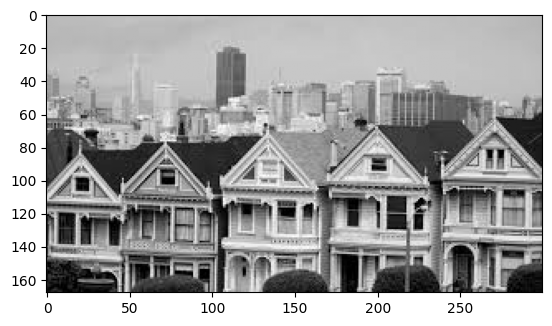

In [3]:
img = cv2.imread('images/SanFrancisco.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(img,cmap = 'gray')

Now you can work on the rest :) 

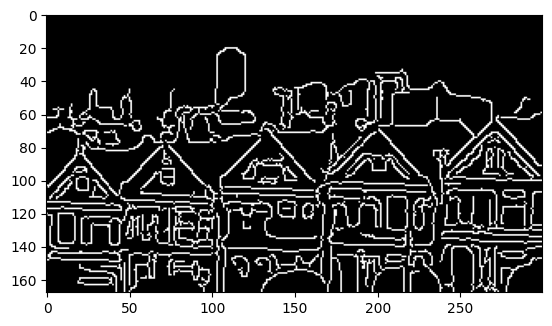

In [10]:
img_blurred = cv2.GaussianBlur(img, (7,7), 0)
edges = cv2.Canny(img_blurred, 30, 150)
plt.imshow(edges,cmap = 'gray')

# Activity 2 - Image Tracking

You can track the position of an object in an image by using what is called template matching. Let's apply template matching on a video of the Thymio robot following a line and attempt to track the position of the robot throughout the video using the different techniques that opencv provides. 

First we are going to load the video and store the different frames. 




In [ ]:
cap = cv2.VideoCapture('images/thymio_line_following.mp4')

# Check if camera opened successfully
if not cap.isOpened(): 
    print("Error opening video stream or file")

video_imgs = []

while True:
    ret, frame = cap.read()
    if ret == True:
        video_imgs.append(frame)
    # Break the loop
    else:
        break
        
print("There are {} frames in the video".format(len(video_imgs)))

Let's take one of the frames and crop the Thymio to make our template. In frame 420, the Thymio is located between x = \[446, 611\] and y = \[312, 484\] (determined using the cursor on the image). Why are we doing it this way? Template matching does not work well if you take a reference / template image that is not to scale w.r.t the image you are going to be looking in. One solution is to use multi-scale [template matching](https://www.pyimagesearch.com/2015/01/26/multi-scale-template-matching-using-python-opencv/). We are not going to go into that here but the link provided gives an example of how that could be implemented.  

Let's display the portion of frame 420 where the Thymio is.

In [ ]:
template = video_imgs[420][312:484,446:611,:]
plt.figure()
plt.imshow(template)
plt.show()

Now have a look at the opencv tutorial [here](https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html) and apply the different template matching techniques on the image and the template. 

***Which methods seems the most robust and why?***


Once you have selected the algorithm that you believe to be the most appropriate, apply it to the set of images that were extracted from the video. To visualise the result of the process, we have provided a browse images function which when provided the individual images lets you nagivate through them with a slider. 

***What are the limitations of template matching?***
 

In [ ]:
from ipywidgets import interact

%matplotlib inline

def browse_images(images, titles = None):
    if titles == None:
        titles = [i for i in range(len(images))]
        
    n = len(images)
    def view_image(i):
        plt.imshow(images[i], cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(titles[i], y=-0.5)
        plt.show()
    interact(view_image, i=(0,n-1))


**/!\ If you have problems with the slider widget, make sure you have installed and activated the jupyter-js-widgets/extension (see https://jupyter-contrib-nbextensions.readthedocs.io/en/latest/install.html)**